In [1]:
import tensorflow as tf

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
len(X_train)

50000

In [4]:
x_train_n=[]
y_train_n=[]
for i in range(len(X_train)):
    if y_train[i]==[2] or y_train[i]==[0]:
        x_train_n.append(X_train[i])
        y_train_n.append(y_train[i])

In [5]:
len(x_train_n)

10000

In [6]:
y_train=np.array(y_train_n).reshape(-1,)
y_train

array([2, 2, 2, ..., 0, 0, 2], dtype=uint8)

In [7]:
classes=['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.colorbar()
    plt.grid(True)
    plt.show()
    print("Class ID: %s and Class name: %s" % (y[index], classes[y[index]]))

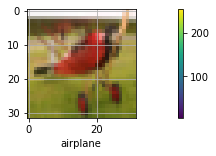

Class ID: 0 and Class name: airplane


In [8]:
plot_sample(x_train_n, y_train,6)

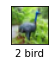

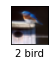

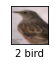

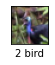

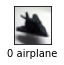

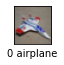

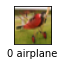

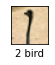

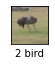

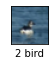

In [9]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train_n[i], cmap=plt.cm.binary)
  plt.xlabel("%s %s" % (y_train[i], classes[y_train[i]]))
  plt.show()

In [10]:
x_train=np.array(x_train_n)/255
x_train

array([[[[0.64313725, 0.80784314, 0.32941176],
         [0.41176471, 0.54901961, 0.23921569],
         [0.4627451 , 0.58039216, 0.39607843],
         ...,
         [0.42745098, 0.57647059, 0.28627451],
         [0.42352941, 0.57647059, 0.27058824],
         [0.35686275, 0.50588235, 0.22352941]],

        [[0.65490196, 0.83529412, 0.32941176],
         [0.45490196, 0.62745098, 0.19215686],
         [0.28235294, 0.42745098, 0.16862745],
         ...,
         [0.41176471, 0.55686275, 0.30980392],
         [0.41176471, 0.55686275, 0.28235294],
         [0.34901961, 0.49803922, 0.22352941]],

        [[0.54901961, 0.74901961, 0.25490196],
         [0.55686275, 0.75686275, 0.25882353],
         [0.46666667, 0.63921569, 0.30980392],
         ...,
         [0.40784314, 0.54509804, 0.32941176],
         [0.32941176, 0.47058824, 0.22745098],
         [0.30588235, 0.45098039, 0.19215686]],

        ...,

        [[0.54509804, 0.58039216, 0.31764706],
         [0.55686275, 0.60784314, 0.29019608]

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
313/313 [==============================] - 24s 77ms/step - loss: 0.6933 - accuracy: 0.5070
Epoch 2/5
313/313 [==============================] - 23s 72ms/step - loss: 0.6218 - accuracy: 0.5142
Epoch 3/5
313/313 [==============================] - 25s 78ms/step - loss: 0.6102 - accuracy: 0.5298
Epoch 4/5
313/313 [==============================] - 23s 74ms/step - loss: 0.6046 - accuracy: 0.5478
Epoch 5/5
313/313 [==============================] - 23s 73ms/step - loss: 0.5843 - accuracy: 0.6638


In [13]:
x_test_n=[]
y_test_n=[]
for i in range(len(X_test)):
    if y_test[i]==[2] or y_test[i]==[0]:
        x_test_n.append(X_test[i])
        y_test_n.append(y_test[i])

In [14]:
len(x_test_n)

2000

In [15]:
y_test=np.array(y_test_n).reshape(-1,)
y_test

array([0, 0, 0, ..., 0, 2, 0], dtype=uint8)

In [16]:
x_test=np.array(x_test_n)/255
x_test

array([[[[0.60784314, 0.61176471, 0.58431373],
         [0.65490196, 0.69019608, 0.73333333],
         [0.69019608, 0.70196078, 0.75686275],
         ...,
         [0.78823529, 0.76862745, 0.81960784],
         [0.79215686, 0.79215686, 0.83137255],
         [0.75294118, 0.71764706, 0.67058824]],

        [[0.6       , 0.60784314, 0.61568627],
         [0.63921569, 0.70196078, 0.8       ],
         [0.67058824, 0.72156863, 0.84313725],
         ...,
         [0.79215686, 0.81568627, 0.87058824],
         [0.79607843, 0.84313725, 0.89019608],
         [0.74117647, 0.74509804, 0.71764706]],

        [[0.60784314, 0.60392157, 0.6       ],
         [0.62745098, 0.69803922, 0.78823529],
         [0.65882353, 0.7254902 , 0.83529412],
         ...,
         [0.80784314, 0.81568627, 0.84313725],
         [0.8       , 0.84313725, 0.87843137],
         [0.74117647, 0.74901961, 0.72156863]],

        ...,

        [[0.34901961, 0.30980392, 0.24313725],
         [0.22352941, 0.20784314, 0.20392157]

In [17]:
ann.evaluate(x_test, y_test)

63/63 [==============================] - 1s 16ms/step - loss: 0.5037 - accuracy: 0.7765


[0.5036907196044922, 0.7764999866485596]

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report:\n', classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           2       0.77      0.78      0.78      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



In [20]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
313/313 [==============================] - 10s 33ms/step - loss: 0.5146 - accuracy: 0.7638
Epoch 2/10
313/313 [==============================] - 10s 33ms/step - loss: 0.3669 - accuracy: 0.8417
Epoch 3/10
313/313 [==============================] - 12s 39ms/step - loss: 0.3423 - accuracy: 0.8492
Epoch 4/10
313/313 [==============================] - 12s 40ms/step - loss: 0.3109 - accuracy: 0.8689
Epoch 5/10
313/313 [==============================] - 12s 40ms/step - loss: 0.2964 - accuracy: 0.87630s - loss: 0
Epoch 6/10
313/313 [==============================] - 10s 32ms/step - loss: 0.2741 - accuracy: 0.8852
Epoch 7/10
313/313 [==============================] - 10s 31ms/step - loss: 0.2621 - accuracy: 0.8939
Epoch 8/10
313/313 [==============================] - 8s 27ms/step - loss: 0.2473 - accuracy: 0.8963
Epoch 9/10
313/313 [==============================] - 10s 32ms/step - loss: 0.2283 - accuracy: 0.9057
Epoch 10/10
313/313 [==============================] - 10s 33ms/step - 

In [21]:
cnn.evaluate(x_test, y_test)

63/63 [==============================] - 1s 8ms/step - loss: 0.2750 - accuracy: 0.8860


[0.27496904134750366, 0.8859999775886536]

In [23]:
y_test.shape

(2000,)

In [24]:
y_test[:5]

array([0, 0, 0, 2, 0], dtype=uint8)

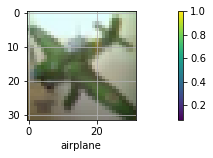

Class ID: 0 and Class name: airplane


In [25]:
plot_sample(x_test, y_test, 4)

In [26]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[9.4011229e-01, 2.4758156e-09, 5.9887700e-02, 1.7375172e-09,
        5.0098774e-09, 1.2233218e-09, 6.7045067e-09, 2.0373974e-09,
        8.1227147e-10, 7.4967388e-10],
       [9.8448837e-01, 4.4697703e-07, 1.5507980e-02, 3.2490402e-07,
        8.9410287e-07, 2.0794333e-07, 9.3887587e-07, 4.8553937e-07,
        1.6548422e-07, 1.3143070e-07],
       [9.0277940e-02, 4.6378487e-10, 9.0972203e-01, 1.8550306e-10,
        5.8254040e-10, 8.2322965e-10, 6.4300681e-10, 3.0785793e-10,
        2.3400235e-10, 8.4554386e-10],
       [6.4884415e-03, 2.0938732e-08, 9.9351150e-01, 1.6638309e-08,
        2.0115390e-08, 3.8337205e-08, 1.9020547e-08, 1.1934215e-08,
        1.4727207e-08, 2.9559335e-08],
       [3.3975980e-01, 3.8158451e-08, 6.6023993e-01, 3.0081733e-08,
        6.1383240e-08, 4.8913318e-08, 6.6985884e-08, 3.2639775e-08,
        1.8567917e-08, 3.5529958e-08]], dtype=float32)

In [27]:
y_classes= [np.argmax(element) for element in y_pred]

In [28]:
y_classes[:10]

[0, 0, 2, 2, 2, 2, 0, 2, 2, 0]

In [29]:
y_test[:10]

array([0, 0, 0, 2, 0, 2, 0, 0, 2, 2], dtype=uint8)

In [30]:
print('Classification Report:\n', classification_report(y_test, y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1000
           2       0.86      0.92      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [31]:
classes[y_classes[10]]

'bird'

In [32]:
classes[y_classes[3]]

'bird'

In [33]:
classes[y_classes[5]]

'bird'

In [34]:
classes[y_classes[6]]

'airplane'